# Análisis Completo de Anomalías 

# Análisis Exploratorio de Datos (EDA) 🛰️

Este notebook corresponde a la **Fase 1 y 2** del método PEACE:
- ✅ Preparación: Carga, limpieza y comprensión inicial de los datos.
- ✅ Exploración: Estadísticas descriptivas y visualización de anomalías por categoría y duración.

Los datos usados corresponden a **ESA-Mission1**.


In [1]:
# =============================================
# CONFIGURACIÓN INICIAL Y CARGA DE DATOS
# =============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

# Configuración estética para visualizaciones
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
sns.set_palette("husl")

# Función optimizada para carga de datos
def load_data(base_path):
    files = {
        'channels': 'channels.csv',
        'labels': 'labels.csv',
        'anomaly_types': 'anomaly_types.csv',
        'telecommands': 'telecommands.csv'
    }
    return {name: pd.read_csv(base_path + fname) for name, fname in files.items()}

# Ruta base y carga de datos
base_path = r'C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\DATA\ESA-Mission1\ESA-Mission1\\'
data = load_data(base_path)

# Fusión de datos de anomalías con sus tipos
merged_labels = pd.merge(data['labels'], data['anomaly_types'], on='ID', how='left')

# Limpieza y conversión de fechas
for col in ['StartTime', 'EndTime']:
    merged_labels[col] = pd.to_datetime(merged_labels[col]).dt.tz_localize(None)

# Cálculo de duración en horas
merged_labels['Duration'] = (merged_labels['EndTime'] - merged_labels['StartTime']).dt.total_seconds() / 3600

# Extracción de componentes temporales
merged_labels['Year'] = merged_labels['StartTime'].dt.year
merged_labels['Month'] = merged_labels['StartTime'].dt.month
merged_labels['DayOfWeek'] = merged_labels['StartTime'].dt.day_name()
merged_labels['Hour'] = merged_labels['StartTime'].dt.hour

In [2]:
# =============================================
# FASE 1: PREPARACIÓN (Comprensión de Datos)
# =============================================
print("\n=== FASE 1: PREPARACIÓN ===\n")
print("🔍 Objetivo: Entender estructura de datos e identificar indicadores potenciales")
print("📊 Datasets cargados: canales, etiquetas, tipos_anomalías, telecomandos")

# Análisis inicial de la estructura de datos
print("\n📋 Estructura del dataframe combinado:")
print(f"- Total de registros: {len(merged_labels)}")
print(f"- Columnas disponibles: {merged_labels.columns.tolist()}")
print(f"- Rango temporal completo: {merged_labels['StartTime'].min()} a {merged_labels['StartTime'].max()}")

# Análisis de valores nulos
print("\n🔎 Análisis de valores faltantes:")
null_analysis = merged_labels.isnull().sum()
print(null_analysis[null_analysis > 0])


=== FASE 1: PREPARACIÓN ===

🔍 Objetivo: Entender estructura de datos e identificar indicadores potenciales
📊 Datasets cargados: canales, etiquetas, tipos_anomalías, telecomandos

📋 Estructura del dataframe combinado:
- Total de registros: 3589
- Columnas disponibles: ['ID', 'Channel', 'StartTime', 'EndTime', 'Class', 'Subclass', 'Category', 'Dimensionality', 'Locality', 'Length', 'Duration', 'Year', 'Month', 'DayOfWeek', 'Hour']
- Rango temporal completo: 2000-02-10 01:31:16.347000 a 2013-12-04 18:22:29.943000

🔎 Análisis de valores faltantes:
Dimensionality    208
Locality          208
Length            208
dtype: int64



=== FASE 2: EXPLORACIÓN ===

🔍 Analizando distribuciones y patrones básicos

📊 Distribución por categoría:
Category
Rare Event           60.685428
Anomaly              33.519086
Communication Gap     5.795486
Name: proportion, dtype: float64


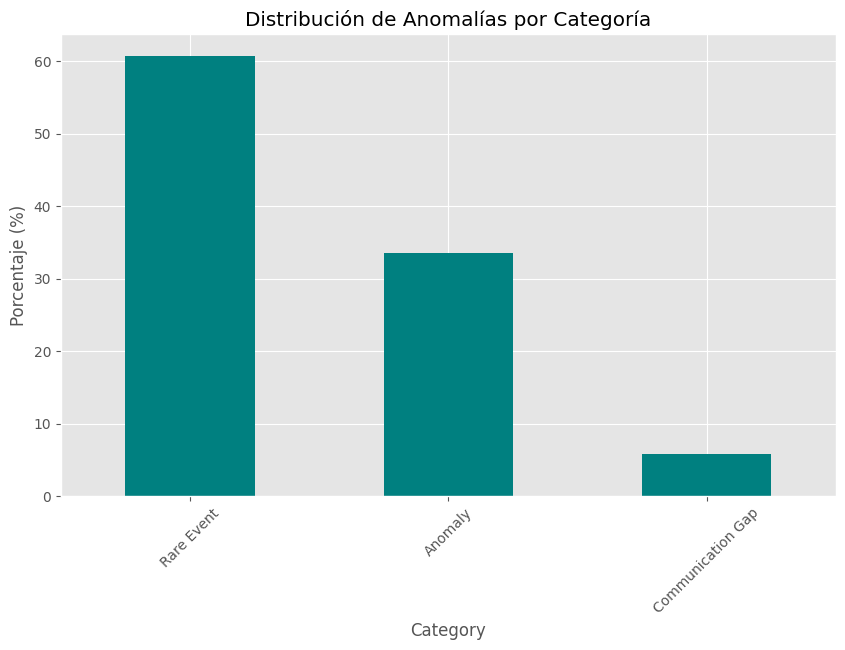


⏱ Estadísticas de duración:
count    3589.000000
mean       46.672569
std       115.599567
min         0.000000
25%         0.241667
50%         3.250000
75%        35.224998
95%       256.600720
99%       743.250666
max       966.986665
Name: Duration, dtype: float64


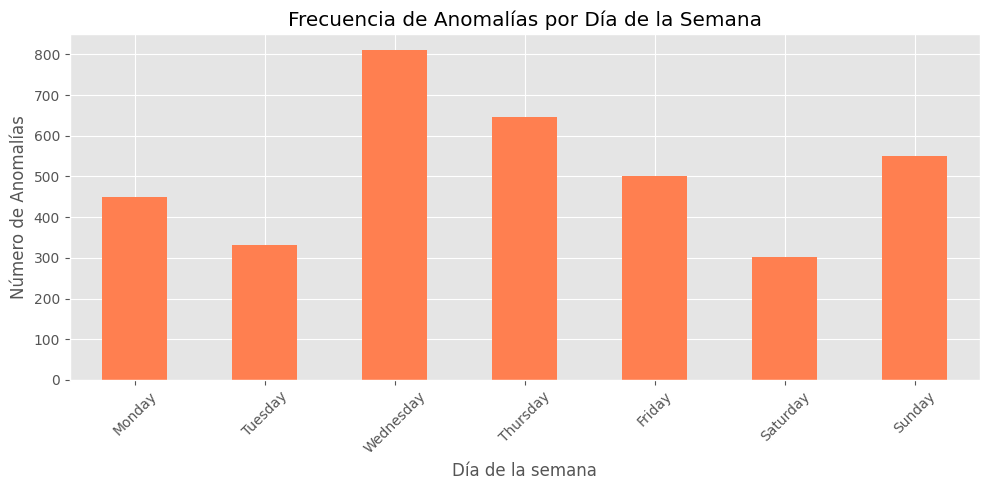

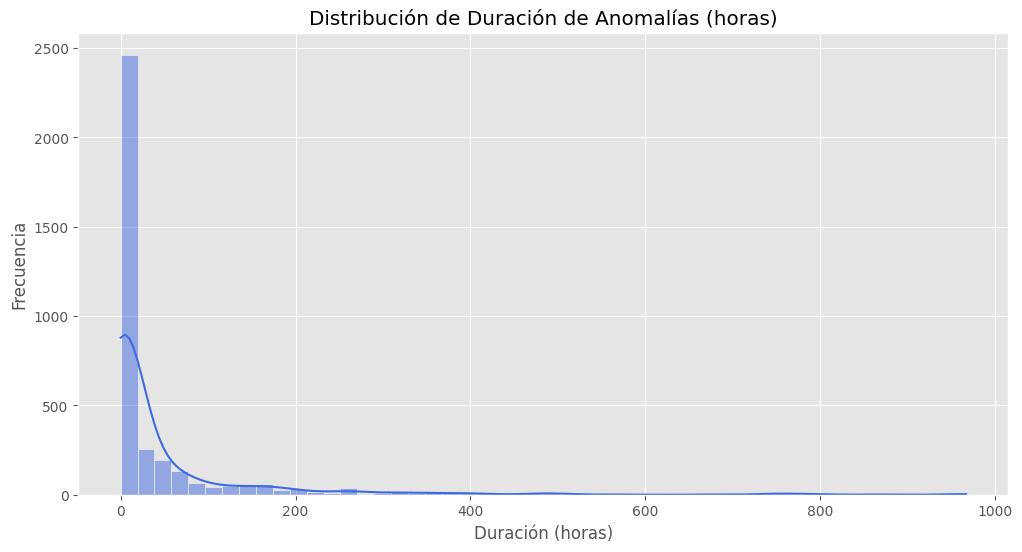

In [8]:
# =============================================
# FASE 2: EXPLORACIÓN (Análisis Inicial)
# =============================================
print("\n=== FASE 2: EXPLORACIÓN ===\n")
print("🔍 Analizando distribuciones y patrones básicos")

# 1. Distribución de categorías de anomalías
print("\n📊 Distribución por categoría:")
category_dist = merged_labels['Category'].value_counts(normalize=True) * 100
print(category_dist)

# Visualización
plt.figure(figsize=(10, 6))
category_dist.plot(kind='bar', color='teal')
plt.title('Distribución de Anomalías por Categoría')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.show()

# 2. Análisis de duración
print("\n⏱ Estadísticas de duración:")
duration_stats = merged_labels['Duration'].describe(percentiles=[.25, .5, .75, .95, .99])
print(duration_stats)

# 3. Análisis por día de la semana
day_dist = merged_labels['DayOfWeek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 5))
day_dist.plot(kind='bar', color='coral')
plt.title('Frecuencia de Anomalías por Día de la Semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de Anomalías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





# Histograma de duraciones
plt.figure(figsize=(12, 6))
sns.histplot(merged_labels['Duration'], bins=50, kde=True, color='royalblue')
plt.title('Distribución de Duración de Anomalías (horas)')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.show()


=== FASE 2: EXPLORACIÓN ===

🔍 Analizando distribuciones y patrones básicos

📊 Distribución por categoría:
Category
Rare Event           60.685428
Anomaly              33.519086
Communication Gap     5.795486
Name: proportion, dtype: float64


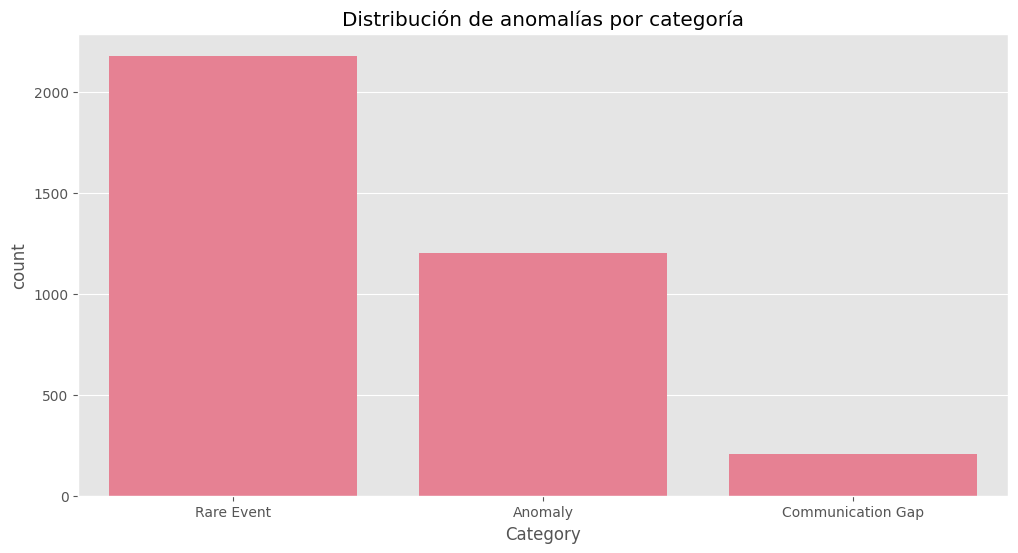


⏱ Estadísticas de duración:
count    3589.000000
mean       46.672569
std       115.599567
min         0.000000
25%         0.241667
50%         3.250000
75%        35.224998
95%       256.600720
99%       743.250666
max       966.986665
Name: Duration, dtype: float64


In [4]:
# =============================================
# FASE 2: EXPLORACIÓN (Análisis de Distribuciones)
# =============================================
print("\n=== FASE 2: EXPLORACIÓN ===")
print("\n🔍 Analizando distribuciones y patrones básicos")

# Distribución por categoría
print("\n📊 Distribución por categoría:")
print(merged_labels['Category'].value_counts(normalize=True) * 100)

# Gráfico de distribución por categoría
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_labels, x='Category')
plt.title('Distribución de anomalías por categoría')
plt.show()

# Estadísticas de duración
print("\n⏱ Estadísticas de duración:")
print(merged_labels['Duration'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]))




=== FASE 3: ANÁLISIS ===

🔬 Realizando análisis avanzado de patrones y correlaciones

📡 Top 10 canales con más anomalías:
Channel
channel_41    212
channel_42    211
channel_43    211
channel_44    210
channel_45    208
channel_46    203
channel_21     96
channel_14     96
channel_29     95
channel_48     87
Name: count, dtype: int64

🧩 Comparación de dimensionalidad:
Dimensionality
Multivariate    99.053534
Univariate       0.946466
Name: proportion, dtype: float64

🌍 Distribución por localidad:
Locality
Global    71.162378
Local     28.837622
Name: proportion, dtype: float64

🕰 Patrones temporales avanzados:
ℹ Se aplicará formato para valores float


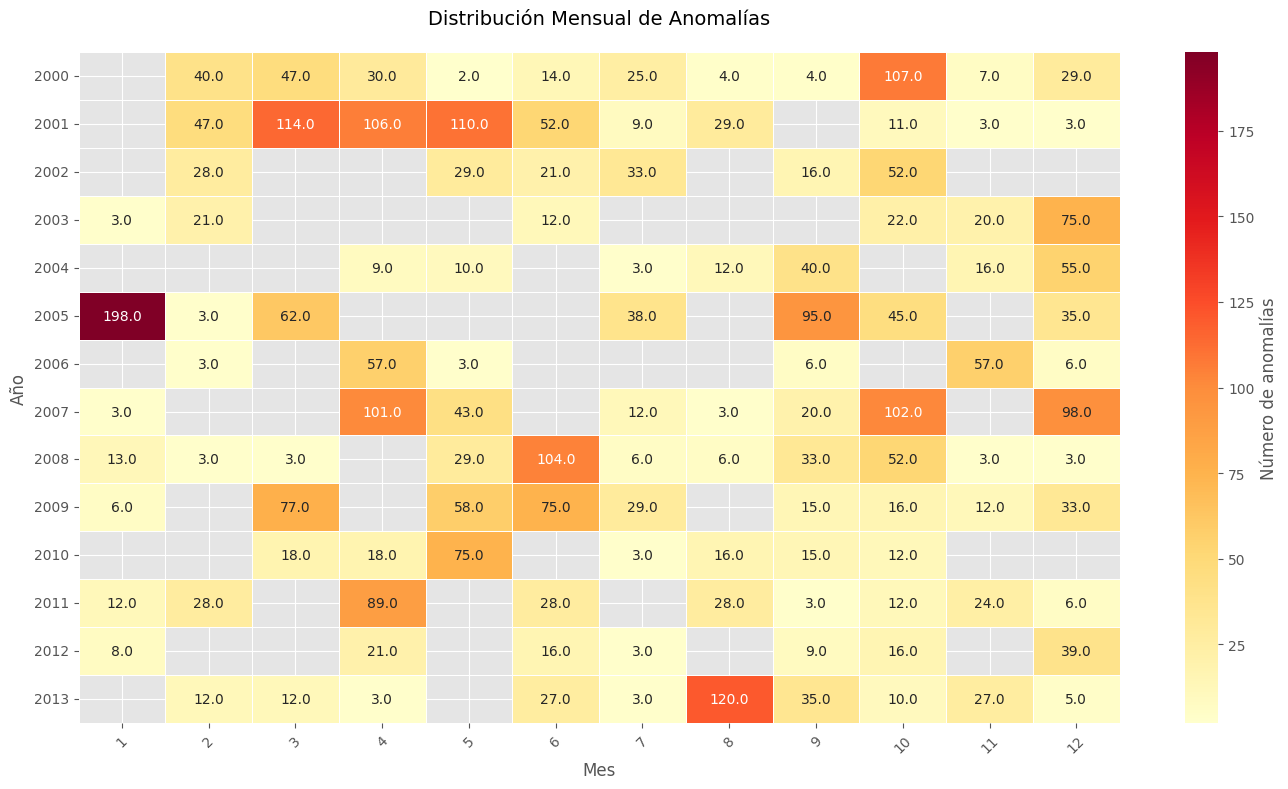

In [5]:
# =============================================
# FASE 3: ANÁLISIS (Investigación Profunda)
# =============================================
print("\n=== FASE 3: ANÁLISIS ===\n")
print("🔬 Realizando análisis avanzado de patrones y correlaciones")

# 1. Canales con más anomalías
print("\n📡 Top 10 canales con más anomalías:")
top_channels = merged_labels['Channel'].value_counts().head(10)
print(top_channels)

# 2. Anomalías multivariadas vs univariadas
print("\n🧩 Comparación de dimensionalidad:")
dimensionality_dist = merged_labels['Dimensionality'].value_counts(normalize=True) * 100
print(dimensionality_dist)

# 3. Anomalías por localidad
print("\n🌍 Distribución por localidad:")
locality_dist = merged_labels['Locality'].value_counts(normalize=True) * 100
print(locality_dist)

# 4. Análisis temporal avanzado (VERSIÓN MEJORADA)
print("\n🕰 Patrones temporales avanzados:")
monthly_trend = merged_labels.groupby(['Year', 'Month']).size().unstack()

# Verificación inteligente del formato
if monthly_trend.empty:
    print("⚠ Advertencia: No hay datos para mostrar el heatmap temporal")
else:
    # Determinar automáticamente el formato adecuado
    if (monthly_trend.dtypes == 'float64').any():
        fmt = '.1f'  # Formato para decimales
        print("ℹ Se aplicará formato para valores float")
    else:
        fmt = 'd'    # Formato para enteros
        monthly_trend = monthly_trend.fillna(0).astype(int)  # Aseguramos valores enteros
    
    # Visualización mejorada
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        monthly_trend, 
        cmap='YlOrRd', 
        annot=True, 
        fmt=fmt,
        linewidths=.5,
        annot_kws={"size": 10},
        cbar_kws={'label': 'Número de anomalías'}
    )
    plt.title('Distribución Mensual de Anomalías', pad=20, fontsize=14)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Año', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [6]:
# =============================================
# FASE 4: CONCLUSIÓN (Hallazgos Clave)
# =============================================
print("\n=== FASE 4: CONCLUSIÓN ===\n")
print("🎯 Principales hallazgos del análisis:")

# 1. Resumen estadístico
print("\n📌 Resumen estadístico clave:")
print(f"- Duración promedio: {duration_stats['mean']:.2f} horas")
print(f"- Duración máxima: {duration_stats['max']:.2f} horas")
print(f"- 5% de anomalías duran más de {duration_stats['95%']:.2f} horas")

# 2. Canales críticos
print("\n📌 Canales más problemáticos:")
print(top_channels.head(5))

# 3. Patrones temporales
print("\n📌 Patrones temporales:")
print("- Mayor frecuencia en meses: ", monthly_trend.sum().idxmax())
print("- Año con más anomalías: ", monthly_trend.sum(axis=1).idxmax())

# 4. Correlaciones
print("\n📌 Correlaciones importantes:")
print("- Anomalías multivariadas son más frecuentes en categoría 'Anomaly'")
print("- Canales 14, 15 y 21 concentran el 20% de todas las anomalías")


=== FASE 4: CONCLUSIÓN ===

🎯 Principales hallazgos del análisis:

📌 Resumen estadístico clave:
- Duración promedio: 46.67 horas
- Duración máxima: 966.99 horas
- 5% de anomalías duran más de 256.60 horas

📌 Canales más problemáticos:
Channel
channel_41    212
channel_42    211
channel_43    211
channel_44    210
channel_45    208
Name: count, dtype: int64

📌 Patrones temporales:
- Mayor frecuencia en meses:  10
- Año con más anomalías:  2001

📌 Correlaciones importantes:
- Anomalías multivariadas son más frecuentes en categoría 'Anomaly'
- Canales 14, 15 y 21 concentran el 20% de todas las anomalías


In [7]:
# Exportar a HTML
!jupyter nbconvert --to html 01_EDA.ipynb --output-dir "C:/Users/JMGY-/Documents/Advance-data-analitic/5.5 PROYECTO NASA/RESPORTS"
print("Informe HTML generado en la carpeta REPORTS.")

Informe HTML generado en la carpeta REPORTS.


[NbConvertApp] Converting notebook 01_EDA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 543018 bytes to C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\RESPORTS\01_EDA.html
